## IMPORTING THE LIBRARIES

In [1]:
import spotipy
import numpy as np
import requests as re
from random import choice
from bs4 import BeautifulSoup
from IPython.display import display
from spotipy.oauth2 import SpotifyClientCredentials
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import random

## CREATING THE SOUP WITH THE BILLBOARD TOP 100 SONGS URL

In [2]:
page = re.get('https://www.billboard.com/charts/hot-100')
soup = BeautifulSoup(page.content, 'html.parser')

## SCRAPING THE NAME AND THE ARTIST FOR THE TOP 100 SONGS OF THE ACTUAL WEEK

In [3]:
songs_titles = list()
songs_artists = list()

for song_title in soup.select('span.chart-element__information__song'):
    songs_titles.append(song_title.get_text())

for song_artist in soup.select('span.chart-element__information__artist'):
    songs_artists.append(song_artist.get_text())

## PUTTING ALL THE INFORMATION IN A DATAFRAME

In [4]:
songs = pd.DataFrame({'title': songs_titles, 'artist': songs_artists})

## DISPLAYING THE DATAFRAME

In [5]:
display(songs)

,title,artist
0,Way 2 Sexy,Drake Featuring Future & Young Thug
1,Girls Want Girls,Drake Featuring Lil Baby
2,Fair Trade,Drake Featuring Travis Scott
3,Champagne Poetry,Drake
4,Knife Talk,Drake Featuring 21 Savage & Project Pat
...,...,...
95,Summer Of Love,Shawn Mendes & Tainy
96,Ain't Shit,Doja Cat
97,Motley Crew,Post Malone
98,Remote Control,Kanye West


## GETTING MORE SONGS FOR A NEW SOURCE FROM 2018 AND 2019

In [6]:
new_urls = ['https://www.elportaldemusica.es/lists/top-100-canciones/2018', 
            'https://www.elportaldemusica.es/lists/top-100-canciones/2019',
            'https://www.elportaldemusica.es/lists/top-100-canciones/2020']

songs_titles_2 = list()
songs_artists_2 = list()

for url in new_urls:
    
    page_2 = re.get(url)
    soup_2 = BeautifulSoup(page_2.text, 'html.parser')

    for song_title in soup_2.select('div.name'):

        song_title = song_title.get_text()
        song_title = song_title.strip()
        song_title = song_title.rstrip("\n")
        songs_titles_2.append(song_title)

    for song_artist in soup_2.select('div.related'):

        song_artist = song_artist.get_text()
        song_artist = song_artist.strip()
        song_artist = song_artist.rstrip("\n")
        songs_artists_2.append(song_artist)

new_songs = pd.DataFrame({'title':songs_titles_2, 'artist':songs_artists_2})
total_songs = pd.concat([songs, new_songs])
total_songs = total_songs.drop_duplicates(subset = 'title')

## DISPLAYING THE FINAL SONGS DATAFRAME

In [7]:
display(total_songs)

,title,artist
0,Way 2 Sexy,Drake Featuring Future & Young Thug
1,Girls Want Girls,Drake Featuring Lil Baby
2,Fair Trade,Drake Featuring Travis Scott
3,Champagne Poetry,Drake
4,Knife Talk,Drake Featuring 21 Savage & Project Pat
...,...,...
292,Memories,Maroon 5
293,Elegí,"Rauw Alejandro, Dalex, Lenny Tavarez, Dimelo Flow"
295,A GÜIRO,RAFA PABÖN
297,PA' ROMPERLA,BAD BUNNY / DON OMAR


## EXECUTING THE CONNECTION TO THE SPOTIFY API

In [8]:
auth = SpotifyClientCredentials(client_id='9b7031633307470bafd9f8bbec7d32c1', 
                                client_secret='2c57401f088246639991c3f4bc46f36e')
                                
spotify_wrapper = spotipy.Spotify(auth_manager = auth)

## DOWNLOADING A PLAYLIST FROM THE SPOTIFY API

In [9]:
# selected_playlist = spotify_wrapper.user_playlist_tracks("spotify", "6yPiKpy7evrwvZodByKvM9")

In [10]:
# selected_playlist['items'][0]['track']['artists'][0]['name']

## GETTING THE AUDIO FEATURES FOR EVERY SONG - DO NOT EXECUTE IT! (10000 SONGS ARE GOING TO BE REQUESTED)

### I have done the process before and I exported the resulted data from the request to save you 1000 seconds of time 😉

In [11]:
def playlist_audio_features():

    playlist = spotify_wrapper.user_playlist_tracks("spotify", "6yPiKpy7evrwvZodByKvM9")

    songs = list()
    columns = ['song', 'artist']
    audio_columns = list(spotify_wrapper.audio_features(playlist['items'][0]['track']['uri'])[0].keys())

    for column in audio_columns:
        columns.append(column)

    counter = 0

    while playlist['next']:

        for song in range(len(playlist['items'])):

            song_data = list()
            song_name = playlist['items'][song]['track']['name']
            artist_name = playlist['items'][song]['track']['artists'][0]['name']
            song_features = spotify_wrapper.audio_features(playlist['items'][song]['track']['uri'])

            if song_features != [None]:
                song_data.append(song_name)
                song_data.append(artist_name)
                for feature in list(song_features[0].values()):
                    song_data.append(feature)
                songs.append(song_data)

        playlist = spotify_wrapper.next(playlist)

        counter += 1

    return songs, columns

# songs_data, songs_features = playlist_audio_features()
# songs_data_df = pd.DataFrame(songs_data, columns = songs_features)
# songs_data_df.to_csv('spotify_songs_data.csv', index = False)

## IMPORTING THE SPOTIFY SONGS DATA THAT WE EXPORTED IN THE STEP BEFORE

In [12]:
spotify_songs_data = pd.read_csv('spotify_songs_data.csv').dropna()

## VISUALIZING THE SPOTIFY SONGS DATAFRAME

In [13]:
display(spotify_songs_data)

,song,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,2K,Nosaj Thing,0.310,0.445,7,-13.355,0,0.0863,0.09400,0.067800,0.1130,0.1220,95.360,audio_features,33xMbeHzmWd6Od0BmLZEUs,spotify:track:33xMbeHzmWd6Od0BmLZEUs,https://api.spotify.com/v1/tracks/33xMbeHzmWd6...,https://api.spotify.com/v1/audio-analysis/33xM...,152560,3
1,4 Billion Souls,The Doors,0.419,0.565,5,-11.565,1,0.0347,0.13700,0.337000,0.1280,0.6480,151.277,audio_features,3UnyplmZaq547hwsfOR5yy,spotify:track:3UnyplmZaq547hwsfOR5yy,https://api.spotify.com/v1/tracks/3UnyplmZaq54...,https://api.spotify.com/v1/audio-analysis/3Uny...,197707,4
2,4 Minute Warning,Radiohead,0.354,0.302,9,-13.078,1,0.0326,0.59000,0.070900,0.1110,0.2230,123.753,audio_features,1w8QCSDH4QobcQeT4uMKLm,spotify:track:1w8QCSDH4QobcQeT4uMKLm,https://api.spotify.com/v1/tracks/1w8QCSDH4Qob...,https://api.spotify.com/v1/audio-analysis/1w8Q...,244285,4
3,7 Element,Vitas,0.727,0.785,5,-6.707,0,0.0603,0.32500,0.126000,0.3100,0.9600,129.649,audio_features,7J9mBHG4J2eIfDAv5BehKA,spotify:track:7J9mBHG4J2eIfDAv5BehKA,https://api.spotify.com/v1/tracks/7J9mBHG4J2eI...,https://api.spotify.com/v1/audio-analysis/7J9m...,249940,4
4,#9 Dream,R.E.M.,0.571,0.724,0,-5.967,1,0.0260,0.02310,0.003110,0.0919,0.3850,116.755,audio_features,1VZedwJj1gyi88WFRhfThb,spotify:track:1VZedwJj1gyi88WFRhfThb,https://api.spotify.com/v1/tracks/1VZedwJj1gyi...,https://api.spotify.com/v1/audio-analysis/1VZe...,278320,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9813,Concert of Wolwes In Canada's Forests,Natural Sounds,0.167,0.110,11,-27.323,0,0.0489,0.99000,0.895000,0.1560,0.0378,87.755,audio_features,74lCVPIg04nxxalNsC2r6H,spotify:track:74lCVPIg04nxxalNsC2r6H,https://api.spotify.com/v1/tracks/74lCVPIg04nx...,https://api.spotify.com/v1/audio-analysis/74lC...,371067,3
9814,One Dance,Drake,0.791,0.619,1,-5.886,1,0.0532,0.00784,0.004230,0.3510,0.3710,103.989,audio_features,1xznGGDReH1oQq0xzbwXa3,spotify:track:1xznGGDReH1oQq0xzbwXa3,https://api.spotify.com/v1/tracks/1xznGGDReH1o...,https://api.spotify.com/v1/audio-analysis/1xzn...,173987,4
9815,I Took A Pill In Ibiza - Seeb Remix,Mike Posner,0.663,0.713,7,-6.647,0,0.1120,0.03530,0.000008,0.0843,0.6900,101.965,audio_features,17Fd6Yb7mSbinKG8LoWfFl,spotify:track:17Fd6Yb7mSbinKG8LoWfFl,https://api.spotify.com/v1/tracks/17Fd6Yb7mSbi...,https://api.spotify.com/v1/audio-analysis/17Fd...,197933,4
9816,Work,Rihanna,0.725,0.534,11,-6.238,1,0.0946,0.07520,0.000000,0.0919,0.5580,91.974,audio_features,14WWzenpaEgQZlqPq2nk4v,spotify:track:14WWzenpaEgQZlqPq2nk4v,https://api.spotify.com/v1/tracks/14WWzenpaEgQ...,https://api.spotify.com/v1/audio-analysis/14WW...,219320,4


## EXTRACTING THE USELESS COLUMNS AND CREATING THE CLUSTER

In [14]:
spotify_songs_data_numerical = spotify_songs_data.drop(columns = ['mode', 'time_signature']).select_dtypes(include = np.number).dropna()
scaler = StandardScaler().fit(spotify_songs_data_numerical)
spotify_songs_data_numerical_array = scaler.transform(spotify_songs_data_numerical)
spotify_songs_data_numerical_scaled = pd.DataFrame(spotify_songs_data_numerical_array, columns = spotify_songs_data_numerical.columns)

## DEFINING THE BEST NUMBER OF CLUSTER FOR THE CLUSTERS MODEL

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

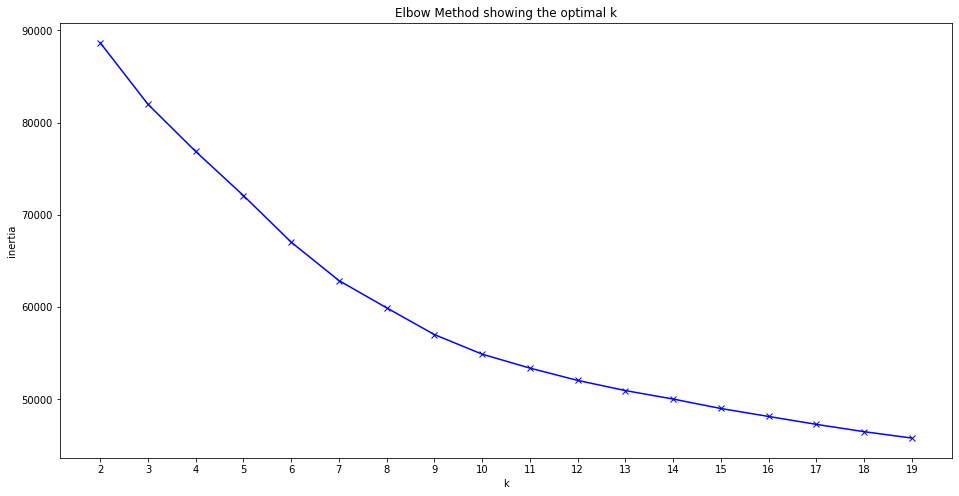

In [15]:
K = range(2, 20)
inertia = []

for k in K:
    
    kmeans = KMeans(n_clusters = k, random_state = 1234)
    kmeans.fit(spotify_songs_data_numerical_scaled)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt

plt.figure(figsize = (16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

## CREATING THE FINAL CLUSTER MODEL WITH THE SELECTED CLUSTER MODEL

In [16]:
kmeans = KMeans(n_clusters = 4, random_state = 1234)
kmeans.fit(spotify_songs_data_numerical_scaled)
spotify_songs_data['cluster'] = kmeans.predict(spotify_songs_data_numerical_scaled)

## SPLITTING THE SONGS USING THE CLUSTER COLUMN

In [17]:
cluster_0 = spotify_songs_data[spotify_songs_data['cluster'] == 0]
cluster_1 = spotify_songs_data[spotify_songs_data['cluster'] == 1]
cluster_2 = spotify_songs_data[spotify_songs_data['cluster'] == 2]

## GET THE FEATURES FOR THE SONG GIVEN BY THE USER

In [18]:
def get_song_features(user_song):

    song = spotify_wrapper.search(q = user_song, type = "track", limit = 1)
    song_uri = song['tracks']['items'][0]['uri']
    song_features = spotify_wrapper.audio_features(song_uri)[0]
    values = [list(song_features.values())]
    columns = list(song_features.keys())

    return pd.DataFrame(data = values, columns = columns)

## GET THE CLUSTER FOR THE USER SONG

In [19]:
def get_cluster(song_features):
    song_features_numerical = song_features.drop(columns = ['mode', 'time_signature']).select_dtypes(include = np.number)
    song_features_array = scaler.transform(song_features_numerical)
    return list(kmeans.predict(song_features_array))[0]

## GETTING THE FINAL SONG RECOMMENDATION

In [28]:
def get_recommendation():

    user_song = input('GIVE ME A SONG: ')

    if user_song in songs_titles:

        songs_titles_copy = songs_titles
        songs_titles_copy.remove(user_song)
        selected_song = random.choice(songs_titles_copy)

    else:
        selected_song = 'No recommendation'

    if selected_song != 'No recommendation':
        return f'Song recommendation: {selected_song}'

    else:
        
        try:
            user_song_features = get_song_features(user_song)
        except IndexError:
            return 'THAT SONG NOT EXIST'

        user_song_cluster = get_cluster(user_song_features)

        if user_song_cluster == 0:
            titles = list(cluster_0['song'].unique())
            print(f'Song recommendation: {choice(titles)}')

        elif user_song_cluster == 1:
            titles = list(cluster_1['song'].unique())
            print(f'Song recommendation: {choice(titles)}')

        else:
            titles = list(cluster_2['song'].unique())
            print(f'Song recommendation: {choice(titles)}')

get_recommendation()

Song recommendation: Live Bed Show
